# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [ ]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [ ]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [ ]:
u = np.ones(3)

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [ ]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [ ]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [ ]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [65]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('taxicab.pkl','rb') as f:
    data = pickle.load(f)
    
print(len(data))
data[0]

1000


0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object

In [3]:
## Extract state space
states = set(data[0])

for i in range(1,len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i) # union is append for sets

states = list(states)

- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?

In [4]:
# Compute transition counts

S = len(states)
tr_counts = np.zeros( (S, S) )

for trip in data: # For each transition
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_from, index_to] += 1

print(f'\nTransition Counts:\n {tr_counts}')


Transition Counts:
 [[2.000000e+00 1.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.000000e+00 2.373110e+05 3.669700e+04 ... 2.070000e+02 2.587200e+04
  7.000000e+00]
 [0.000000e+00 3.796900e+04 1.283151e+06 ... 9.320000e+02 5.129300e+04
  3.400000e+01]
 ...
 [0.000000e+00 1.790000e+02 1.519000e+03 ... 9.750000e+02 1.770000e+02
  0.000000e+00]
 [1.000000e+00 2.221700e+04 5.817500e+04 ... 2.370000e+02 1.280130e+05
  7.000000e+00]
 [0.000000e+00 2.000000e+00 3.700000e+01 ... 0.000000e+00 3.000000e+00
  1.600000e+01]]


In [15]:
sums = tr_counts.sum(axis=0, keepdims=True)
print('State Proportions: \n')
print(sums)

tr_pr = np.divide(tr_counts,sums, 
                            out=np.zeros_like(tr_counts), 
                            where=sums!=0)

print(f'\nTransition Proportions:')
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)

State Proportions: 

[[1.200000e+01 8.886440e+05 2.797713e+06 1.112860e+05 3.701250e+05
  3.705660e+05 3.952740e+05 3.168490e+05 3.851929e+06 1.743220e+05
  2.171620e+05 2.363961e+06 1.063770e+05 1.627050e+05 1.000000e+00
  7.253000e+04 5.102620e+05 3.603000e+03 3.000000e+00 8.393620e+05
  2.292330e+05 4.415950e+05 1.978283e+06 3.859100e+04 1.058730e+05
  1.431200e+04 4.086400e+05 5.790800e+04 8.740550e+05 5.505970e+05
  1.224325e+06 1.803491e+06 5.017430e+05 5.077760e+05 1.038800e+04
  8.010000e+03 6.543970e+05 4.930000e+02]]

Transition Proportions:


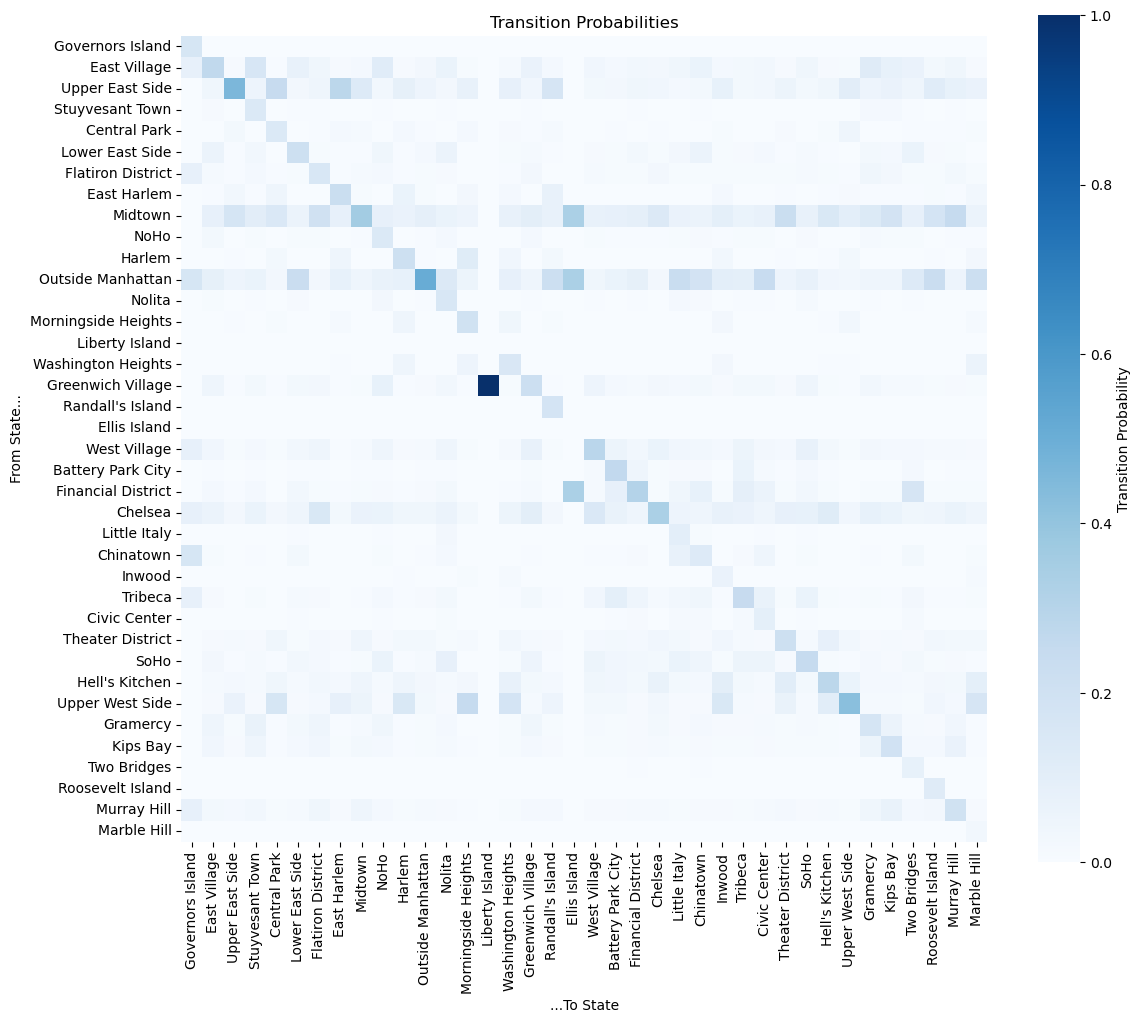

In [8]:
plt.figure(figsize=(13, 11))
sns.heatmap(tr_pr, 
            cmap='Blues',
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.show()

Some of the most common routes are Greenwich Village to Liberty Island, Upper East Side to Upper East Side, Outside Manhattan to Outside Manhattan, Upper West Side to Upper West Side, Midtown to Midtown, Midtown to Ellis Island, and Outside Manhattan to Ellis Island.

- Explain why taxicabs are most likely order 1, and not 2 or more.


Taxicabs are most likely order one because a trip can only have one origin and one destination location. This state space is comprised of neighborhoods of New York, which are mutually exclusive (I assume). A single taxi trip cannot start in both SoHo and Midtown, and cannot end in both Little Italy and Chinatown. 

- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips


In [79]:
initial_state = "Hell's Kitchen" 
state_index = states.index(initial_state) 
print(f'Initial state: {initial_state}') 

n_sims = [2,3,5,10] 

for sim in n_sims:
    simulation = [initial_state]
    for t in range(sim): 
        pr_t = tr_pr[state_index]/np.sum(tr_pr[state_index]) # Had to normalize because of value error
        state_index = np.random.choice(len(states), p=pr_t) # Choose new state index
        simulation.append(states[state_index]) # Append new state to simulation
    print(f'{str(sim)} Trips:')
    print(simulation,"\n")

Initial state: Hell's Kitchen
2 Trips:
["Hell's Kitchen", 'NoHo', 'West Village'] 

3 Trips:
["Hell's Kitchen", 'Greenwich Village', 'Greenwich Village', 'SoHo'] 

5 Trips:
["Hell's Kitchen", 'Theater District', 'Central Park', 'Upper West Side', 'Chelsea', 'Chelsea'] 

10 Trips:
["Hell's Kitchen", 'Harlem', 'Upper East Side', 'Inwood', 'Inwood', 'Washington Heights', 'Marble Hill', 'Marble Hill', 'Inwood', 'Morningside Heights', 'Marble Hill'] 



- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

Washington Heights


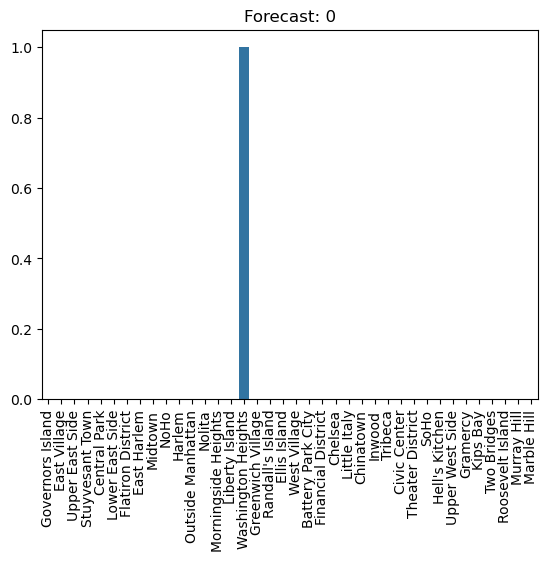

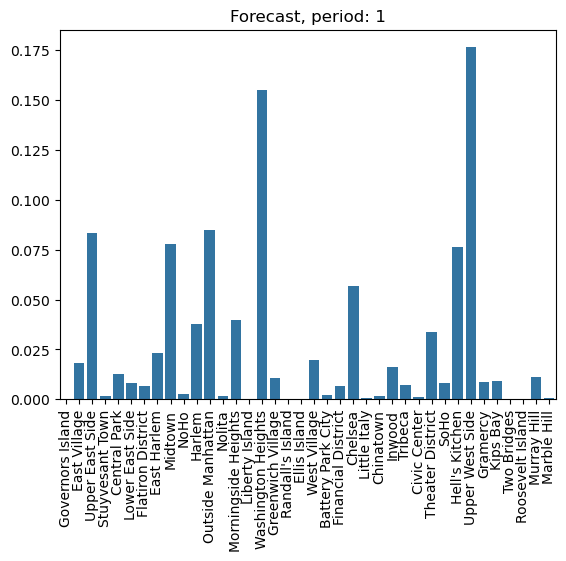

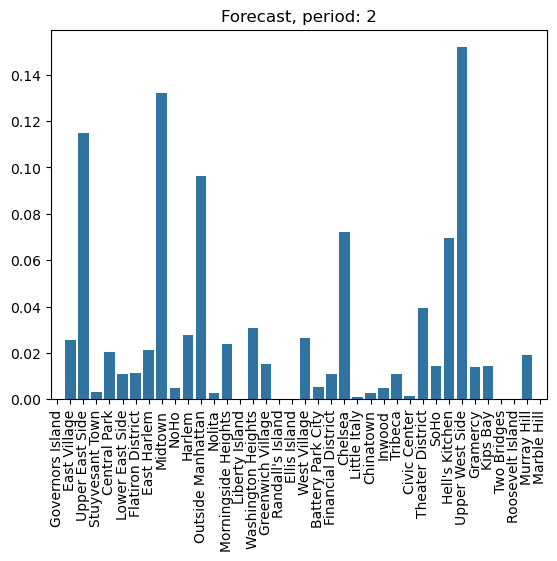

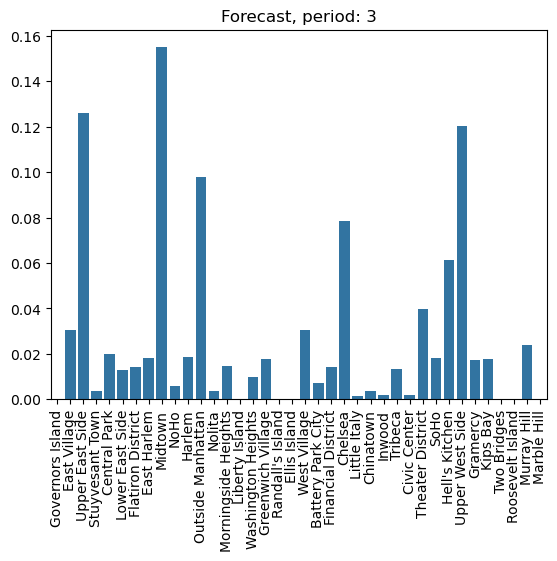

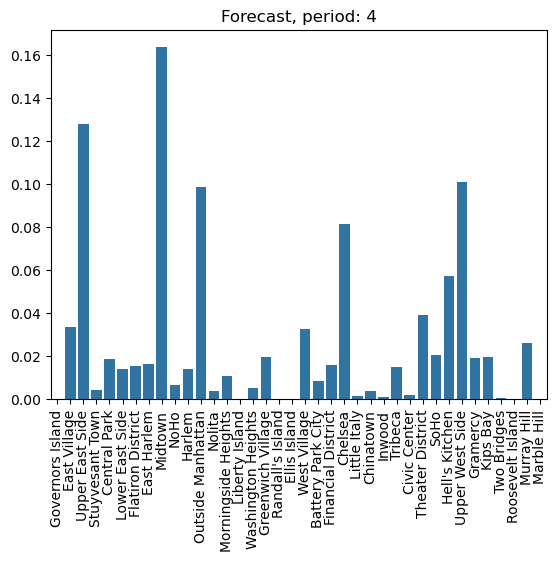

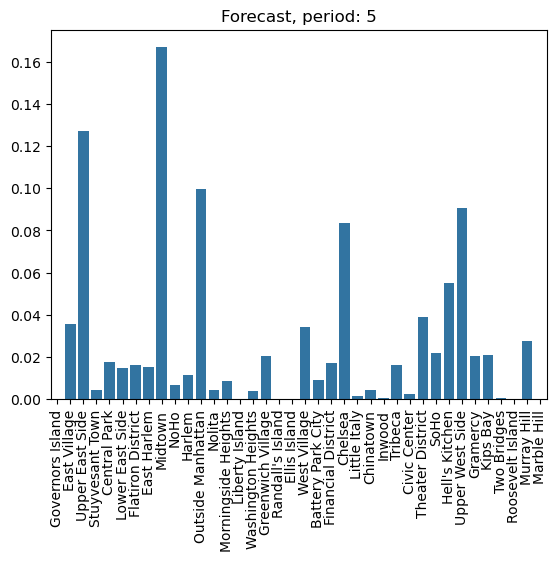

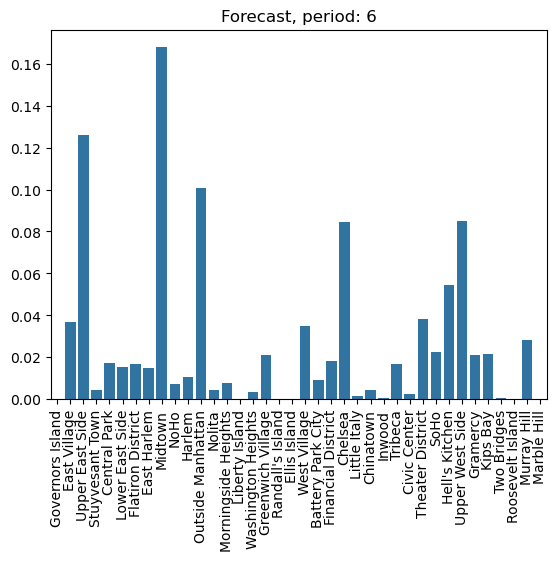

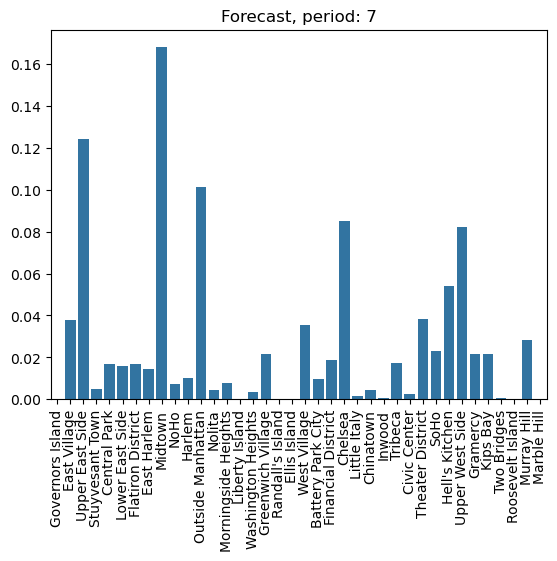

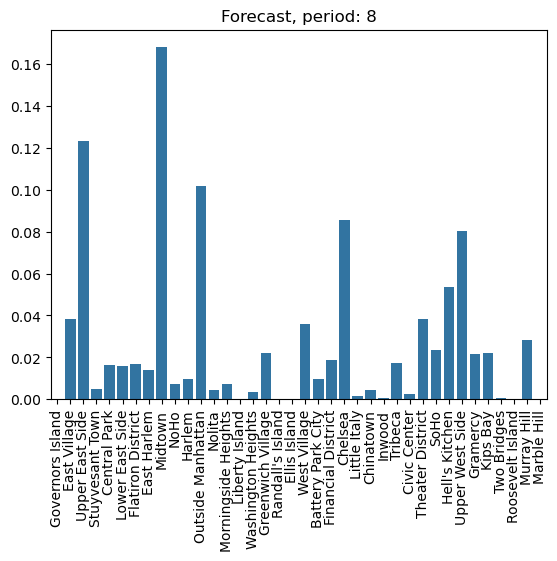

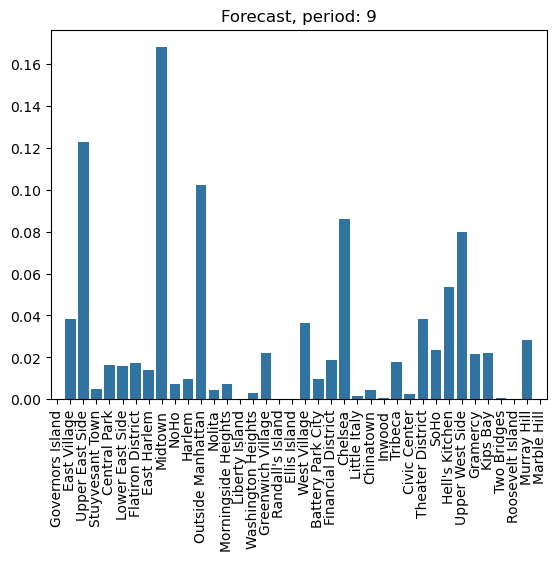

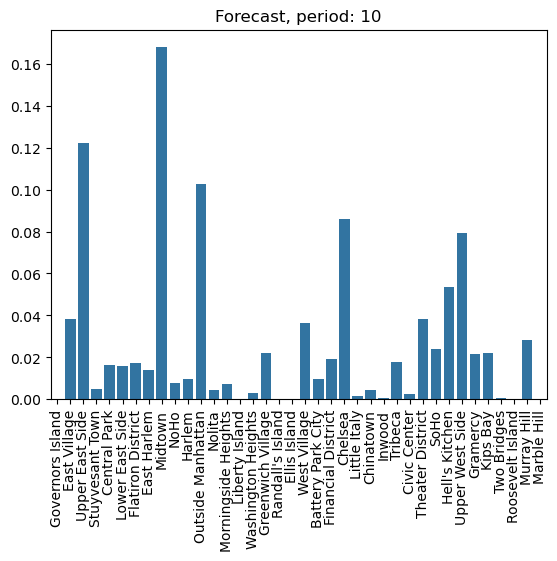

In [84]:
initial_state = np.random.choice(states) # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state
print(initial_state)

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

sns.barplot(x=states,y=density).set(title=f'Forecast: 0')
plt.xticks(rotation=90)
plt.show()

n_sim = 10

forecast = [initial_state]
for t in range(n_sim): 
    density = tr_pr @ density
    forecast.append(density) # Append new forecast
    sns.barplot(x=states,y=density).set(title=f'Forecast, period: {str(t+1)}')
    plt.xticks(rotation=90)
    plt.show()

Running this multiple times and getting the same result no matter what the starting point was, I can conclude that cabs in Manhattan spend most of their time in Midtown.